### POWER TRANSFORMATION APPROACH


In [20]:
## Importing the libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

In [3]:
## load the dataset

df = pd.read_csv("C:\\Users\\Hi\\Downloads\\concrete_data.csv")

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
## Divide the data into X and Y variable

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
x.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [9]:
y.head(2)

0    79.99
1    61.89
Name: Strength, dtype: float64

In [12]:
### splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [15]:
## Model Building

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))

0.6126916026048208
0.6189537692168124


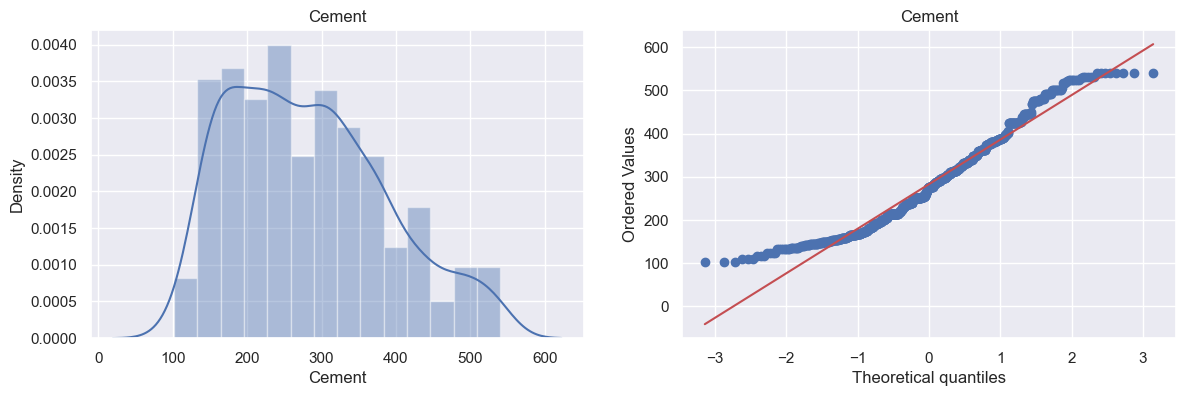

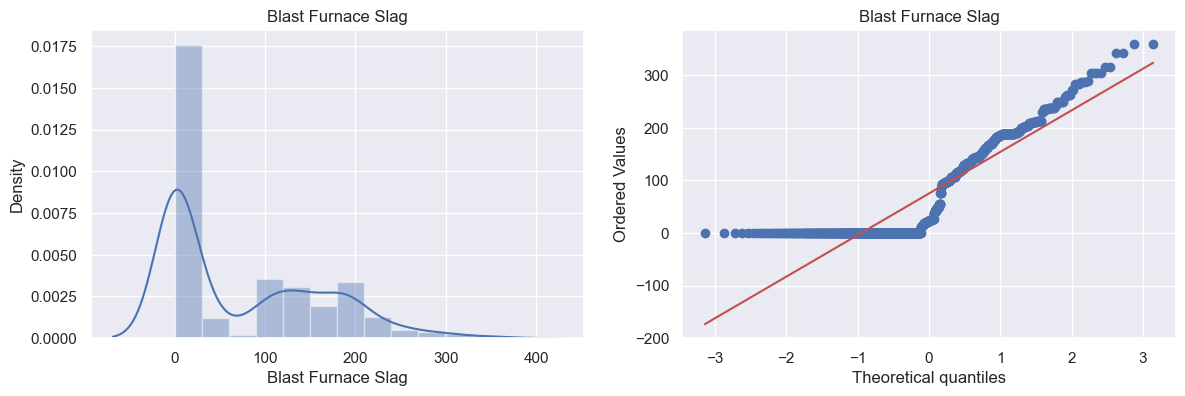

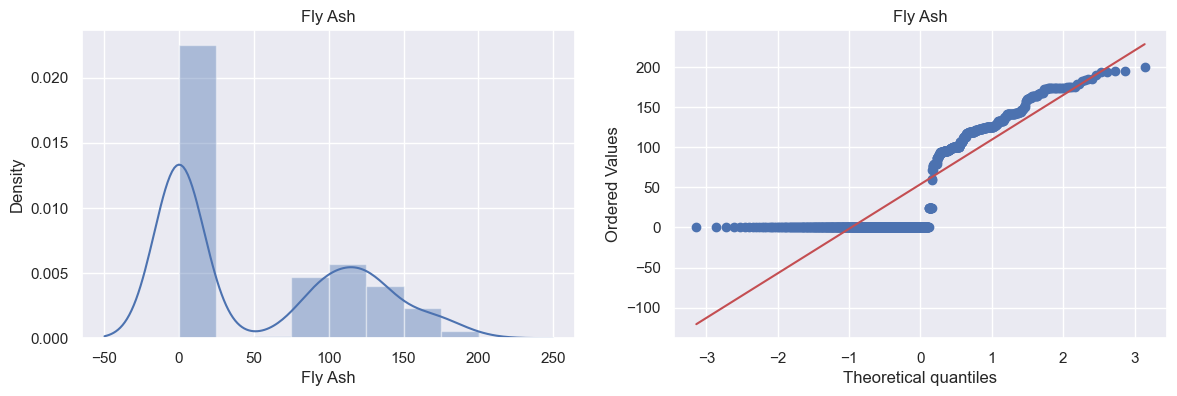

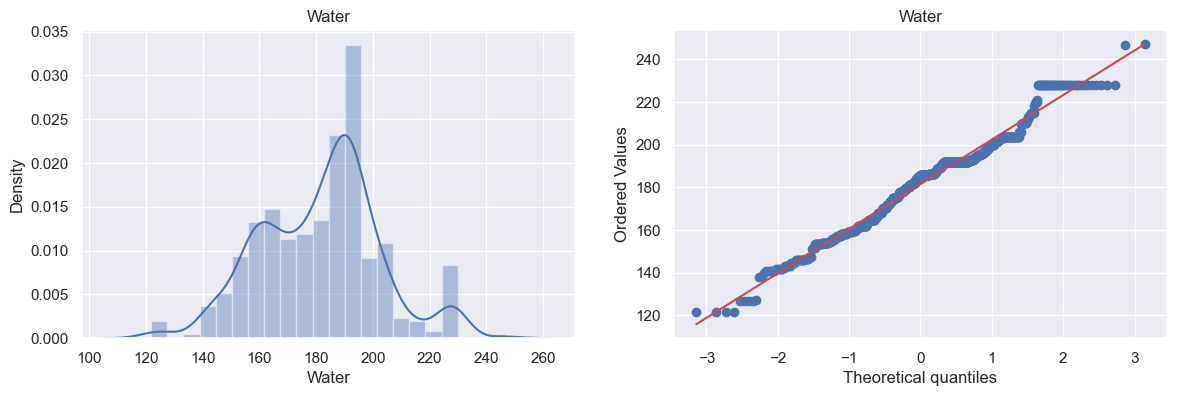

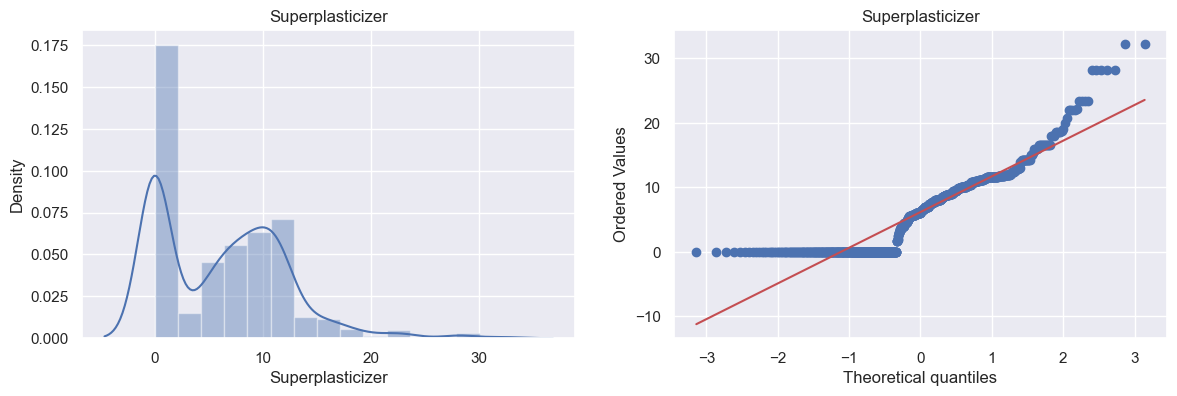

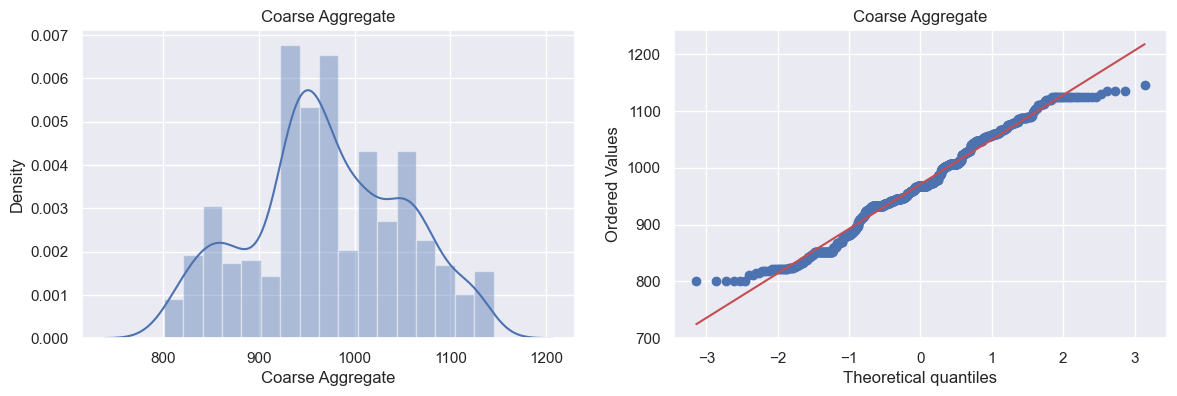

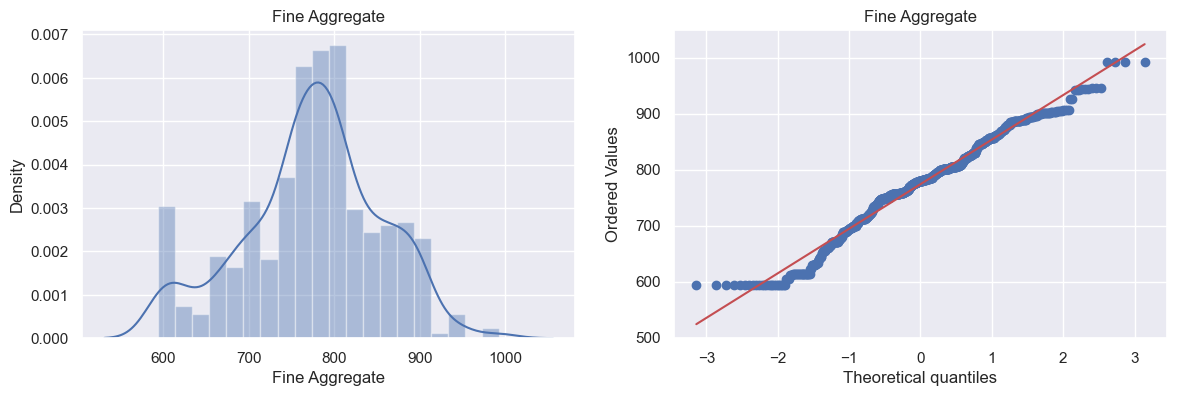

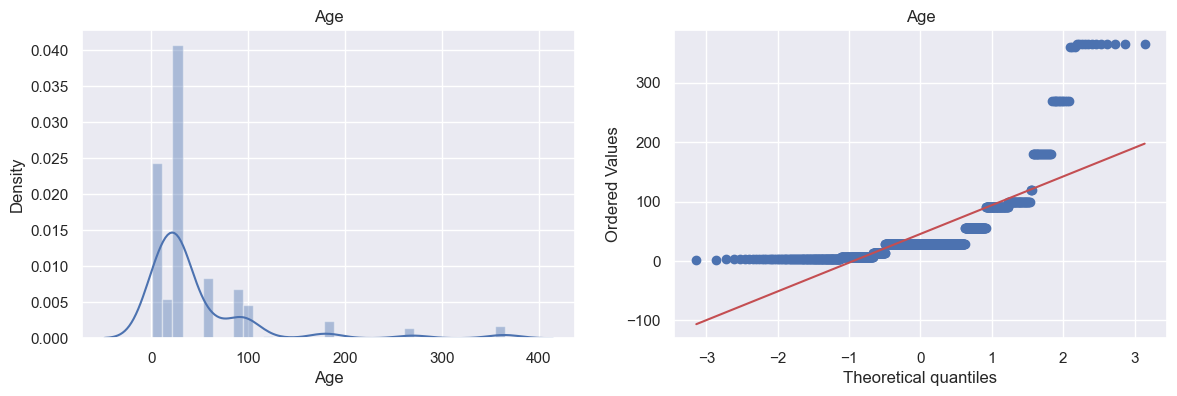

In [21]:
### Q-Q Plot

for col in x_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist = 'norm',plot = plt)
    plt.title(col)
    plt.show

# Box-Cox Transformation

In [27]:
### Applying Box-Cox Transformation

pw = PowerTransformer(method = 'box-cox')
x_train_transform = pw.fit_transform(x_train +0.00001)
x_test_transform = pw.fit_transform(x_test + 0.00001)


In [28]:
lr = LinearRegression()
lr.fit(x_train_transform,y_train)

LinearRegression()

In [29]:
y_pred_train1 = lr.predict(x_train_transform)
y_pred_test1 = lr.predict(x_test_transform)


In [30]:
print(r2_score(y_train,y_pred_train1))
print(r2_score(y_test,y_pred_test1))

0.8077377469305723
0.7799440976571739


In [33]:
x_train_transformed = pd.DataFrame(x_train_transform, columns=x_train.columns)
x_train_transformed


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,0.963375,0.884473,-0.911396,2.198518,-1.300462,-0.495592,-2.092453,2.447390
1,-0.870562,0.993331,-0.911396,2.198518,-1.300462,-0.495592,-1.280524,1.137117
2,0.060839,0.900050,1.067738,1.353966,0.760485,-0.850493,-1.167761,0.112492
3,-1.684503,1.004236,-0.911396,0.205348,-1.300462,1.332839,-0.225438,0.112492
4,0.348706,0.849912,-0.911396,2.198518,-1.300462,-0.495592,-1.280524,2.157445
...,...,...,...,...,...,...,...,...
819,-0.595174,0.946543,-0.911396,1.047717,-1.300462,0.029237,-0.340343,0.112492
820,1.699338,0.687002,1.105270,0.929741,0.523338,-1.889570,-0.949749,-1.028781
821,1.602343,-1.092395,-0.911396,2.198518,-1.300462,-0.495592,-2.092453,1.774324
822,-0.296476,0.964940,-0.911396,0.205348,-1.300462,0.881334,-0.531686,-1.028781


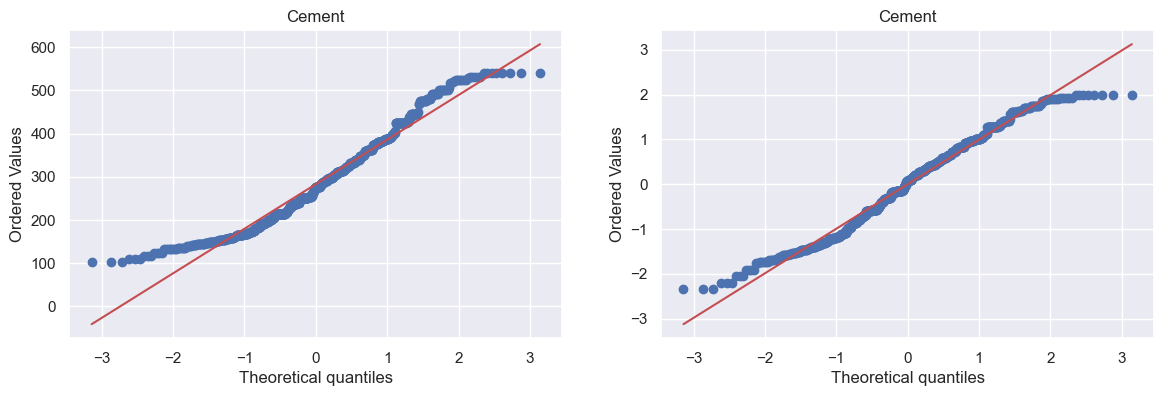

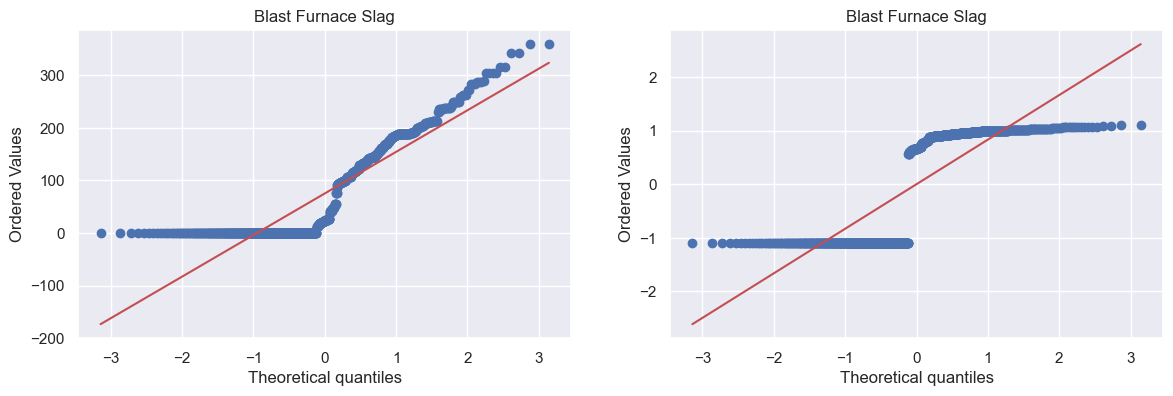

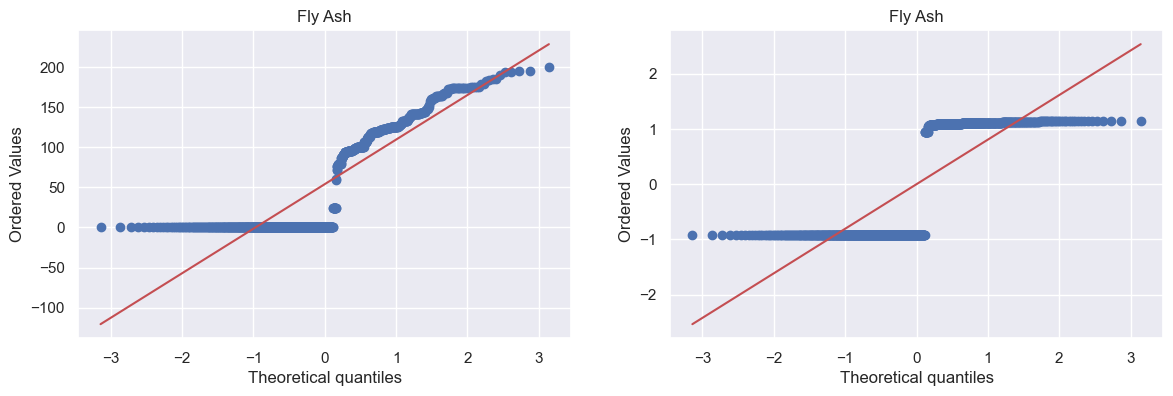

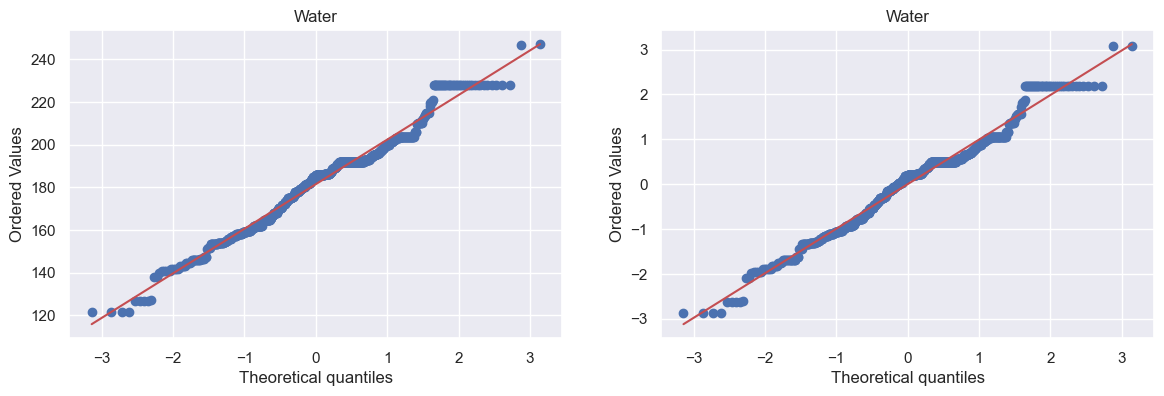

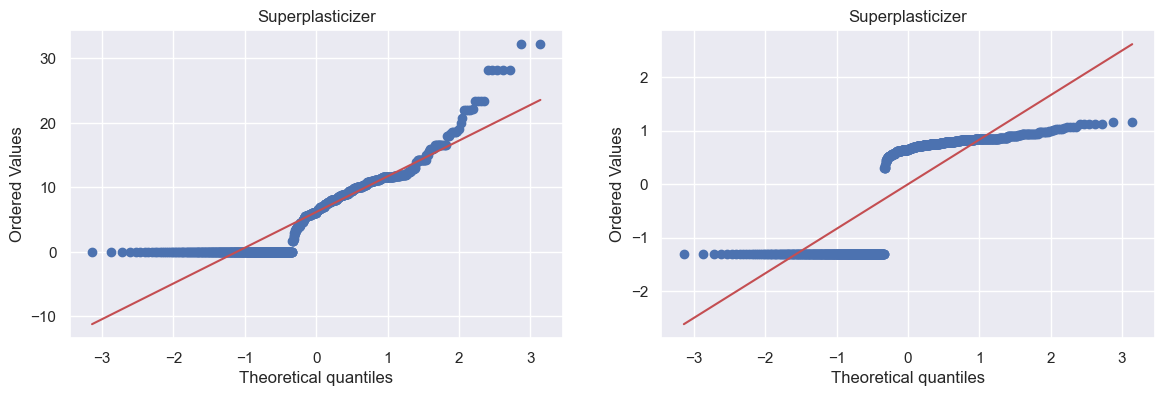

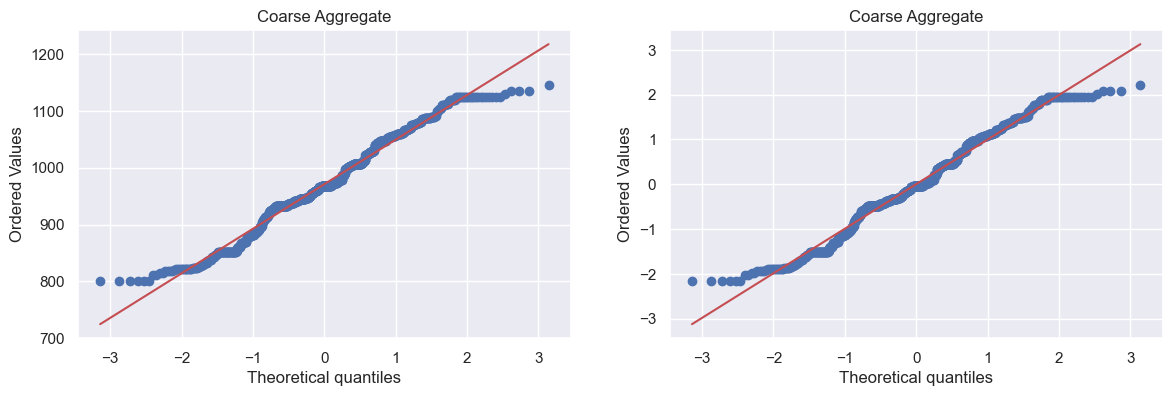

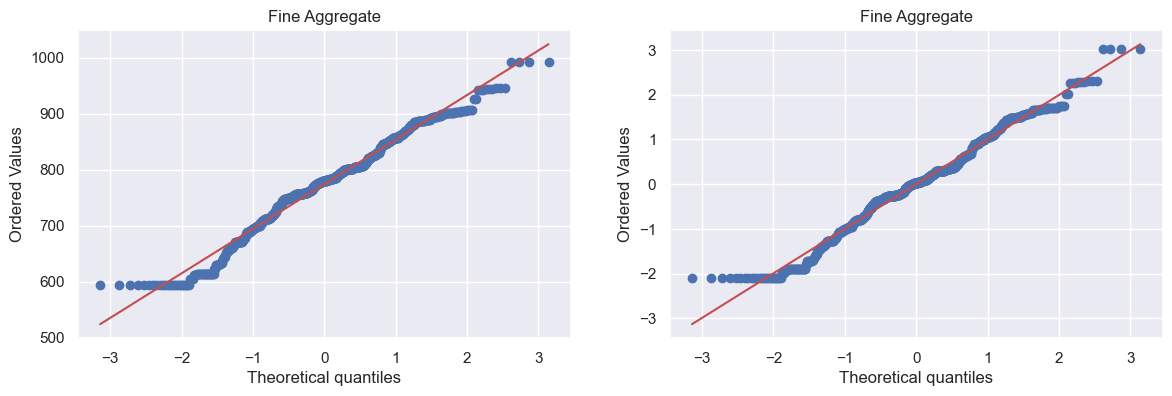

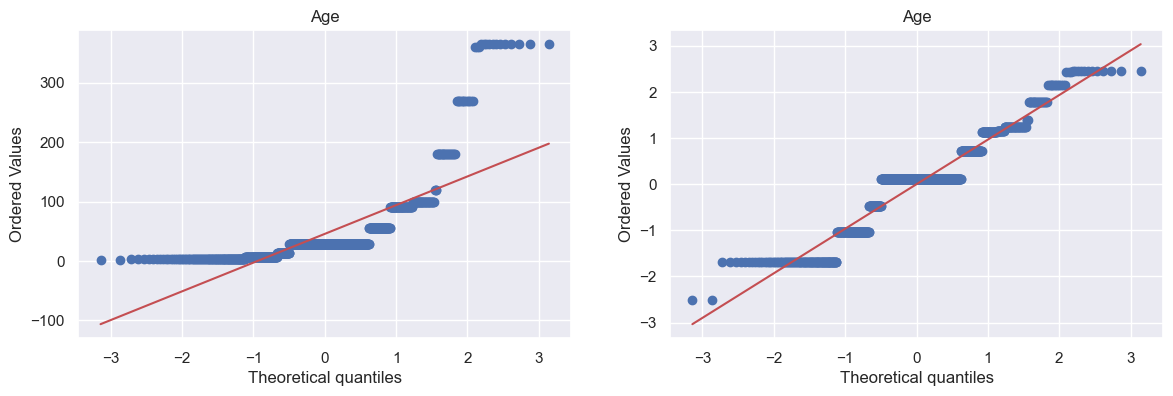

In [34]:
for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x_train[col], dist='norm', plot= plt)
    plt.title(col)
    
    
    plt.subplot(122)
    stats.probplot(x_train_transformed[col], dist='norm', plot= plt)
    plt.title(col)
    
    plt.show()

## Yeo-Johnson Approach

In [41]:
pt = PowerTransformer(method='yeo-johnson')
x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

In [42]:
lr1 = LinearRegression()
lr1.fit(x_train_transform1,y_train)

LinearRegression()

In [43]:
y_pred_train2 = lr1.predict(x_train_transform)
y_pred_test2 = lr1.predict(x_test_transform)


In [44]:
print(r2_score(y_train,y_pred_train2))
print(r2_score(y_test,y_pred_test2))

0.8022724711136469
0.7786104759004884


                                                  *****END*****